# Практическое задание №4

In [1]:
# подключаем нужные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import warnings
warnings.filterwarnings('ignore')

В файле laptops_na.csv" содержаться следующие переменные:

- `"brand"` : Название бренда ноутбука.
- `"Model"` : Конкретная модель или серия ноутбука.
- `"Price"` : Цена ноутбука в индийских рупиях.
- `"Rating"` : Рейтинг, присвоенный ноутбуку на основе его характеристик.
- `"processor_brand"` : Марка процессора, используемого в ноутбуке.
- `"processor_tier"` : Уровень производительности или категория процессора.
- `"num_cores"` : Количество вычислительных ядер в процессоре.
- `"num_threads"` : Количество потоков, поддерживаемых процессором.
- `"ram_memory"` : Объем оперативной памяти, используемый в ноутбуке.
- `"primary_storage_type"` : Тип основного хранилища (например, HDD, SSD).
- `"primary_storage -apacity"` : Емкость основного хранилища ноутбука.
- `"secondary_storage_type"` : Тип вторичного хранилища, если оно доступно.
- `"secondary_storage_capacity"` : Емкость вторичного хранилища ноутбука.
- `"gpu_brand"` : Марка графического процессора (GPU).
- `"gpu_type"` : Тип графического процессора.
- `"is_touch_screen"` : Указывает, оснащен ли ноутбук функцией сенсорного экрана.
- `"display_size"` : Размер дисплея ноутбука в дюймах.
- `"resolution_width"` : Разрешение по ширине дисплея.
- `"resolution_height"` : Разрешение дисплея по высоте.
- `"OS"` : Установленная на ноутбуке операционная система.
- `"year_of_warranty"` : Срок гарантии, предоставляемой на ноутбук, обычно в годах.



Задания:

    •	Постройте модель множественной линейной регрессии. Зависимая переменная - Price. Выберите не менее 7-ми переменных в качестве независимых. Среди независимых переменных должно быть не менее 2 категориальных.
    
    •	Сформулируйте гипотезы исследования.
    
    •	Напишите уравнение регрессии.
    
    •	Оцените характеристики регрессионной модели в целом.
    
    •	Оцените значимость регрессионных коэффициентов. Сравните их между собой по силе взаимосвязи с зависимой переменной.
    
    •	Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной. Это очень важный пункт задания, поскольку именно в нем мы делаем выводы о том, какие факторы и как могут влиять на цену ноутбуков!
    
    •	Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?
    
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

## Для начала посмотрим на наши данные, чтобы выбрать подходящие переменные

In [2]:
# посмотрим на наши данные
df = pd.read_csv('laptops_na.csv', index_col=0)
df.head()

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
index,,,,,,,,,,,,,,,,,,,,,
1.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63.0,intel,core i3,2.0,4.0,NaN,SSD,...,No secondary storage,0.0,intel,integrated,False,15.6,1920.0,1080.0,windows,1
2.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67.0,intel,core i7,4.0,8.0,16.0,SSD,...,No secondary storage,0.0,intel,integrated,False,15.6,1920.0,1080.0,windows,1
3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,SSD,...,No secondary storage,0.0,amd,dedicated,False,NaN,1920.0,1080.0,windows,1
4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,SSD,...,No secondary storage,0.0,intel,integrated,False,14.0,1920.0,1080.0,windows,1
5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,SSD,...,No secondary storage,0.0,amd,integrated,False,15.6,1920.0,1080.0,windows,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1.0 to nan
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   brand                       944 non-null    object 
 1   Model                       946 non-null    object 
 2   Price                       942 non-null    float64
 3   Rating                      936 non-null    float64
 4   processor_brand             930 non-null    object 
 5   processor_tier              950 non-null    object 
 6   num_cores                   958 non-null    float64
 7   num_threads                 953 non-null    float64
 8   ram_memory                  942 non-null    float64
 9   primary_storage_type        932 non-null    object 
 10  primary_storage_capacity    928 non-null    float64
 11  secondary_storage_type      946 non-null    object 
 12  secondary_storage_capacity  942 non-null    float64
 13  gpu_brand                   950 non-nu

In [4]:
# Названия переменных, скруппированные по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

# из обжектов можно выбрать категориальные переменные, из флоатов номинальные

Type: object
['brand' 'Model' 'processor_brand' 'processor_tier' 'primary_storage_type'
 'secondary_storage_type' 'gpu_brand' 'gpu_type' 'is_touch_screen' 'OS'
 'year_of_warranty']

Type: float64
['Price' 'Rating' 'num_cores' 'num_threads' 'ram_memory'
 'primary_storage_capacity' 'secondary_storage_capacity' 'display_size'
 'resolution_width' 'resolution_height']



In [5]:
# Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing
# тут всё хорошово, проценты небольшие

,Процент пропущенных значений
primary_storage_capacity,6.357215
processor_brand,6.155399
resolution_height,6.054490
primary_storage_type,5.953582
Rating,5.549950
resolution_width,5.348133
gpu_type,5.045409
secondary_storage_capacity,4.944501
Price,4.944501
ram_memory,4.944501


#### Зависимая переменная - Price. Опишем её:

In [6]:
df['Price'].describe()

count       942.000000
mean      76964.924628
std       56821.995229
min        9800.000000
25%       43547.500000
50%       61706.000000
75%       88997.500000
max      454490.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

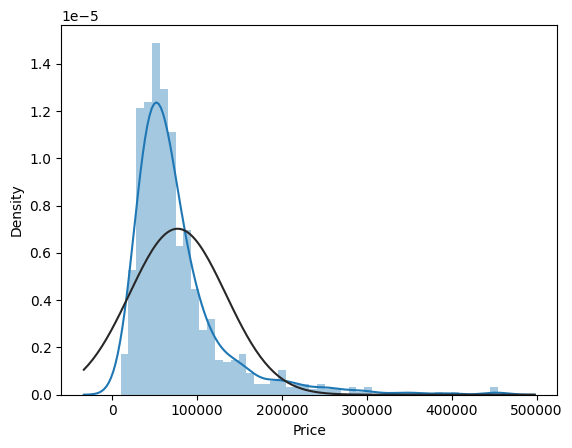

In [7]:
sns.distplot(df.Price, fit=stats.norm)

## 1) Выбор переменных
Нам бы хотелось выбрать независимые между собой переменные, которые будут сильно коррелировать с зависимой переменной Price. Сначала создадим dummy-переменные для большинства категориальных переменных (чтобы потом выбрать наиболее подходящие). Не будем брать в рассмотрение `Model`, так как у каждого ноутбука своя модель, и мы не сможем выявить взаимосвязи

Модели процессоров не будем рассматривать (наверное их можно классно по группкам разбить и зависимости получить, но в датасете нет характеристик процессоров, а я не разбираюсь)

И ещё какие-то переменные я выкинула, так как они слабо коррелировали с `Price` и засоряли картинку, по которой я переменные хорошие отбирала

In [8]:
category_variables = ['primary_storage_type',
    'secondary_storage_type', 'processor_brand', 'gpu_type', 'is_touch_screen', 'OS'
]

# Создание dummy-переменных для всех категориальных переменных
for cat in category_variables:
    current_category_dummies = pd.get_dummies(df[cat], prefix=cat, prefix_sep='_', dtype=int)
    df = pd.concat([df, current_category_dummies], axis=1)

df

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,gpu_type_dedicated,gpu_type_integrated,is_touch_screen_False,is_touch_screen_True,OS_android,OS_chrome,OS_dos,OS_mac,OS_other,OS_windows
index,,,,,,,,,,,,,,,,,,,,,
1.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63.0,intel,core i3,2.0,4.0,NaN,SSD,...,0,1,1,0,0,0,0,0,0,1
2.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67.0,intel,core i7,4.0,8.0,16.0,SSD,...,0,1,1,0,0,0,0,0,0,1
3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,SSD,...,1,0,1,0,0,0,0,0,0,1
4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,SSD,...,0,1,1,0,0,0,0,0,0,1
5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,SSD,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998.0,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990.0,68.0,amd,ryzen 5,6.0,12.0,16.0,SSD,...,1,0,1,0,0,0,0,0,0,1
999.0,NaN,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990.0,73.0,intel,core i7,10.0,16.0,16.0,SSD,...,0,0,1,0,0,0,0,0,0,1
1000.0,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990.0,59.0,amd,ryzen 5,4.0,8.0,8.0,SSD,...,0,1,1,0,0,0,0,0,0,1


<font color='red'>не выбросила референтные группы для категориальных </font>

Теперь посмотрим на корреляции переменных при помощи тепловой карты

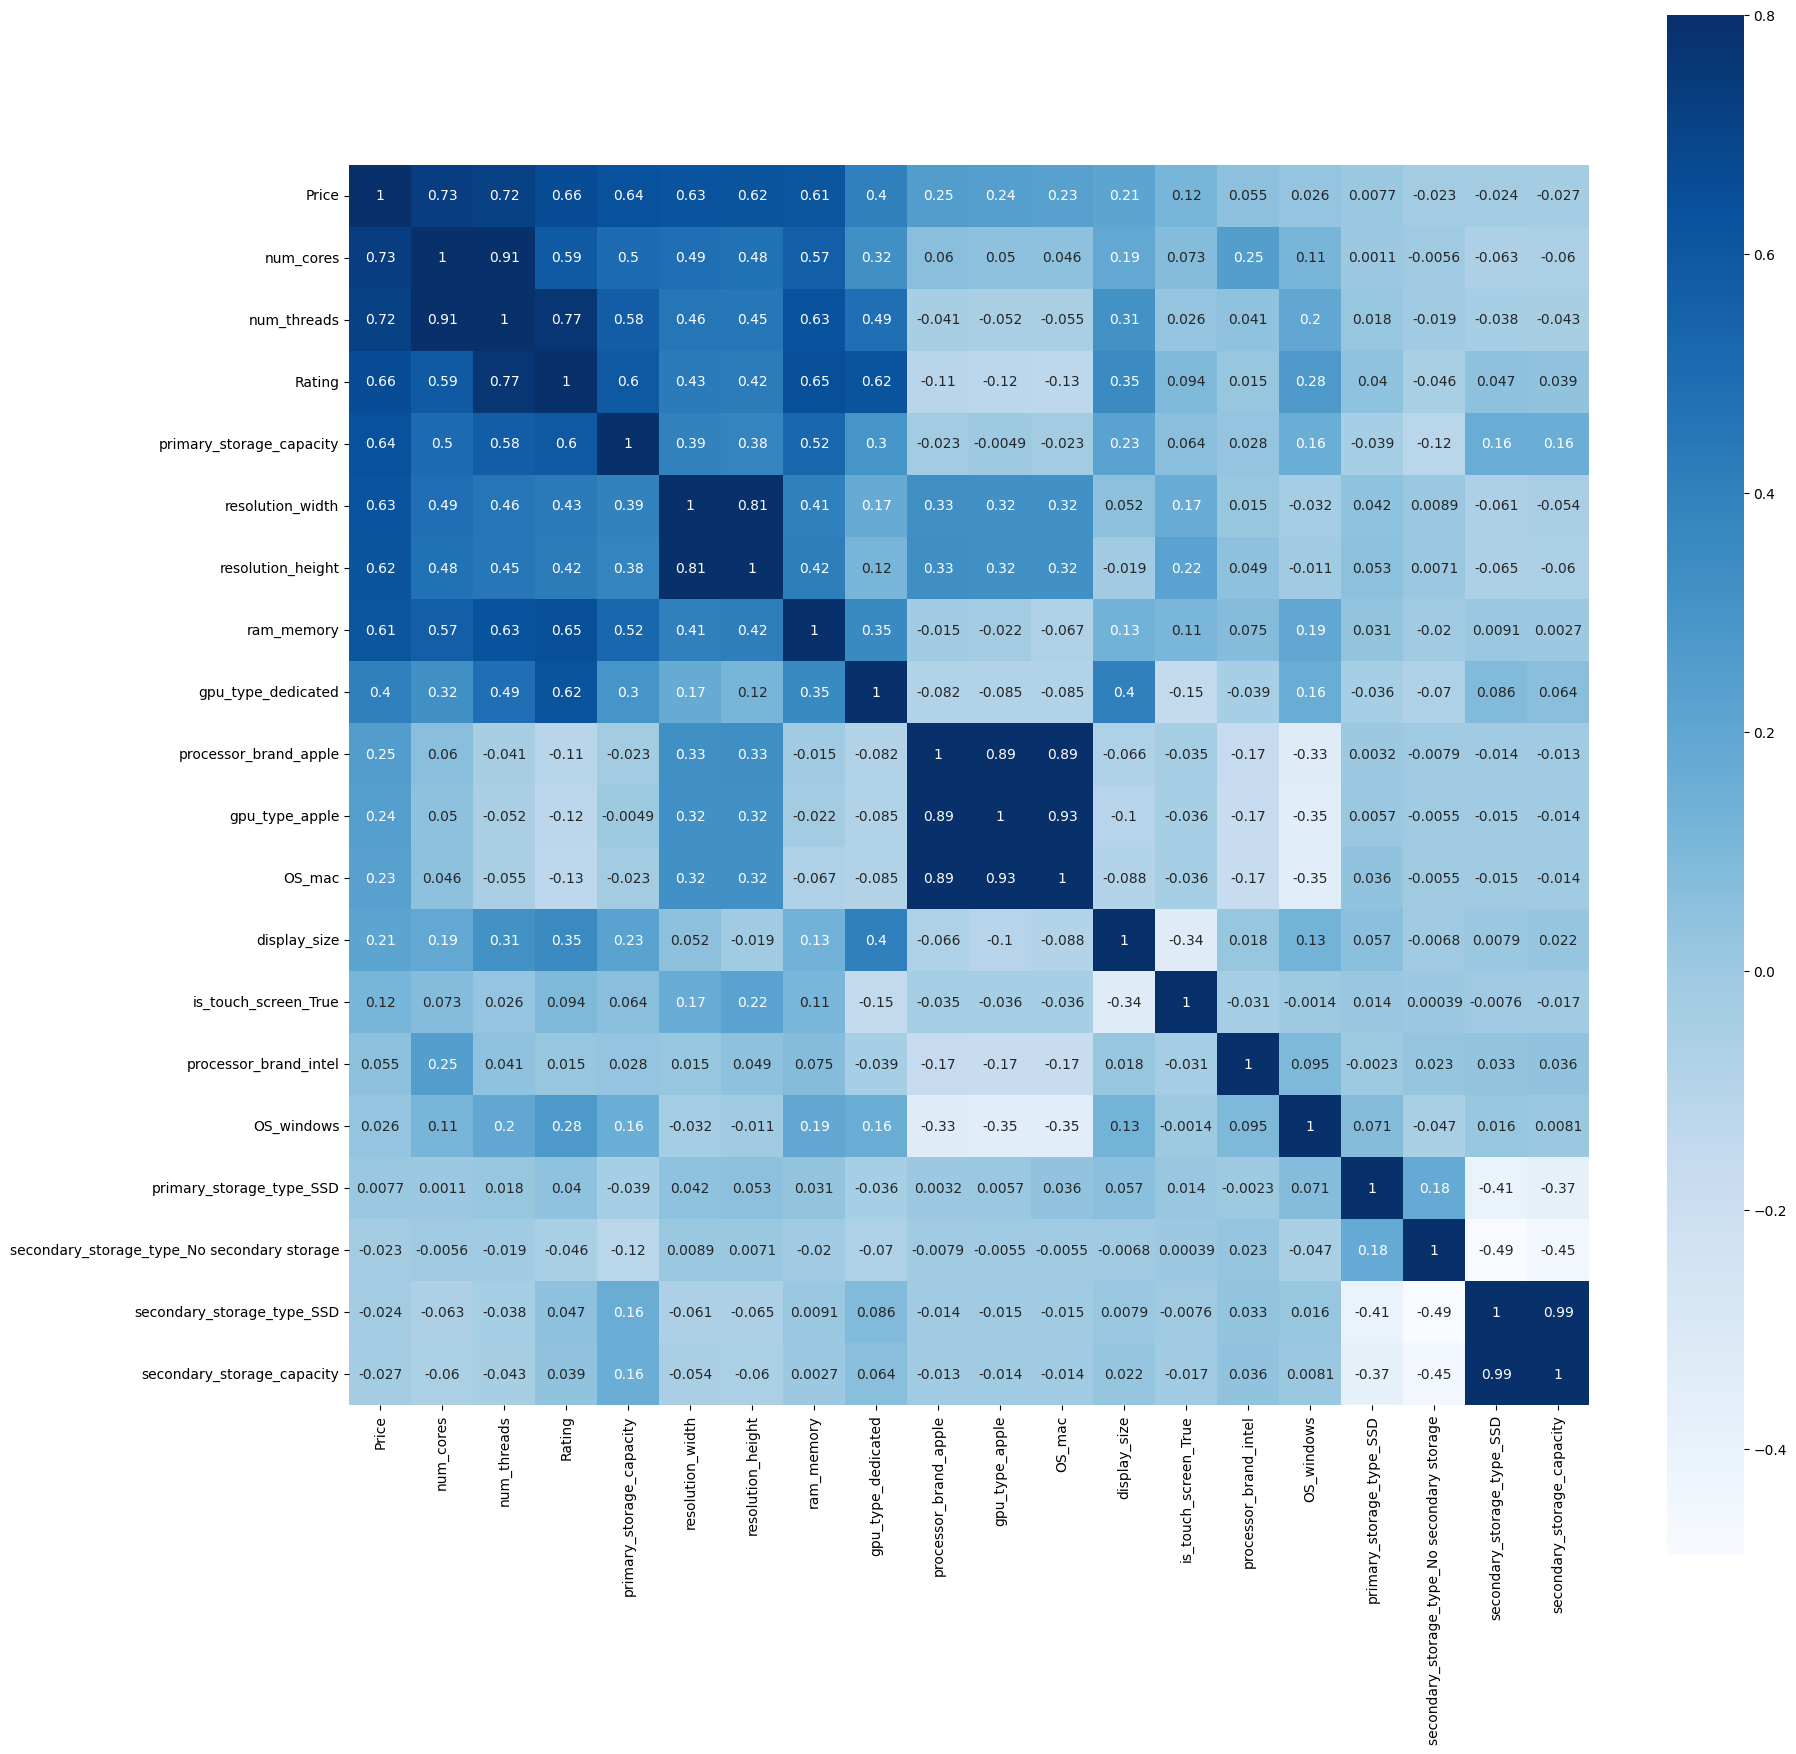

In [9]:
# Все корреляции
corr = df.corr(numeric_only=True)

# Определяем топ-13 переменных с наибольшей корреляцией с Price
top_corr_features = corr['Price'].nlargest(20).index
top_corr_matrix = corr.loc[top_corr_features, top_corr_features]

# Построение тепловой карты
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr_matrix, annot=True, square=True, cmap='Blues', vmax=0.8)
plt.show()


In [10]:
# корреляции зависимой переменной со всеми остальными по убыванию значений коэффициентов корреляции
df.corrwith(df['Price'], numeric_only=True).sort_values(ascending=False)

Price                                          1.000000
num_cores                                      0.725934
num_threads                                    0.716827
Rating                                         0.659263
primary_storage_capacity                       0.636234
resolution_width                               0.628331
resolution_height                              0.618031
ram_memory                                     0.612126
gpu_type_dedicated                             0.402727
processor_brand_apple                          0.253270
gpu_type_apple                                 0.244192
OS_mac                                         0.228744
display_size                                   0.207328
is_touch_screen_True                           0.116615
processor_brand_intel                          0.055041
OS_windows                                     0.026232
primary_storage_type_SSD                       0.007673
secondary_storage_type_No secondary storage   -0

### Выберем переменные
1. `num_cores` очень сильно коррелирует с `num_threads`, что понятно, поскольку от количества ядер зависит количество потоков. При этом `num_cores` больше всего коррелирует с `Price`, поэтому возьмём его в качестве предиктора

num_cores
--------

2. `num_cores` сильно коррелирует с `Rating` (хотя они не сильно связаны, видимо покупатели ожидают крутых показателей от ноутбука, которые получают при большем числе ядер) и с `ram_memory` (вообще они не сильно связаны, но обеспечивают большую производительность ноутбука, поэтому могут повышаться пропорционально). Давайте Rating и ram_memory рассмотрим (а то там не получается 7 независимых переменных найти, которые хорошо коррелируют с ценой...)

Rating и ram_memory
------
3. Возьмём в качестве предикторов `primary_storage_capacity` и `resolution_width`, так как они не очень сильно коррелируют с `num_cores` и между собой (при этом `resolution_width` и `resolution_height` сильно коррелируют (всё-таки определённые пропорции дисплея соблюдаются), при этом с `Price` больше коррелирует `resolution_width`, поэтому его выбрали)

primary_storage_capacity и resolution_width
-------

4. наличие сенсорного экрана не сильно коррелирует с ценой
5. неплохо коррелируют gpu_type и processor_brand с ценой, давайте их рассмотрим

gpu_type и processor_brand (категориальные переменные)
--------
6. остальные переменные плохо коррелируют с ценой

In [11]:
# gpu_indicated не берём, так как она зависит от gpu_type_dedicated
cols = ['num_cores', 'Rating', 'ram_memory', 'primary_storage_capacity', 'resolution_width', 'gpu_type_dedicated',
          'processor_brand_amd', 'processor_brand_apple', 'processor_brand_intel', 'processor_brand_other']
df[cols].corr()

,num_cores,Rating,ram_memory,primary_storage_capacity,resolution_width,gpu_type_dedicated,processor_brand_amd,processor_brand_apple,processor_brand_intel,processor_brand_other
num_cores,1.000000,0.592667,0.567477,0.498138,0.485772,0.323999,-0.278879,0.060433,0.246673,-0.001180
Rating,0.592667,1.000000,0.648302,0.597948,0.430428,0.619465,0.068448,-0.105870,0.015149,-0.212356
ram_memory,0.567477,0.648302,1.000000,0.523424,0.405425,0.354879,-0.053565,-0.015102,0.075095,-0.094229
primary_storage_capacity,0.498138,0.597948,0.523424,1.000000,0.392610,0.301544,-0.021345,-0.023406,0.028182,-0.123566
resolution_width,0.485772,0.430428,0.405425,0.392610,1.000000,0.173119,-0.097844,0.326768,0.015004,-0.091608
gpu_type_dedicated,0.323999,0.619465,0.354879,0.301544,0.173119,1.000000,0.092979,-0.082204,-0.038631,-0.045390
processor_brand_amd,-0.278879,0.068448,-0.053565,-0.021345,-0.097844,0.092979,1.000000,-0.065893,-0.823796,-0.036384
processor_brand_apple,0.060433,-0.105870,-0.015102,-0.023406,0.326768,-0.082204,-0.065893,1.000000,-0.166183,-0.007340
processor_brand_intel,0.246673,0.015149,0.075095,0.028182,0.015004,-0.038631,-0.823796,-0.166183,1.000000,-0.091761
processor_brand_other,-0.001180,-0.212356,-0.094229,-0.123566,-0.091608,-0.045390,-0.036384,-0.007340,-0.091761,1.000000


In [12]:
# proc_bramd_intel сильно коррелирует с proc_brand_amd, поэтому выкинем его
# остальные коррелируют некритично
cols.remove('processor_brand_intel')
df[cols].corr()
# теперь можем построить модель

,num_cores,Rating,ram_memory,primary_storage_capacity,resolution_width,gpu_type_dedicated,processor_brand_amd,processor_brand_apple,processor_brand_other
num_cores,1.000000,0.592667,0.567477,0.498138,0.485772,0.323999,-0.278879,0.060433,-0.001180
Rating,0.592667,1.000000,0.648302,0.597948,0.430428,0.619465,0.068448,-0.105870,-0.212356
ram_memory,0.567477,0.648302,1.000000,0.523424,0.405425,0.354879,-0.053565,-0.015102,-0.094229
primary_storage_capacity,0.498138,0.597948,0.523424,1.000000,0.392610,0.301544,-0.021345,-0.023406,-0.123566
resolution_width,0.485772,0.430428,0.405425,0.392610,1.000000,0.173119,-0.097844,0.326768,-0.091608
gpu_type_dedicated,0.323999,0.619465,0.354879,0.301544,0.173119,1.000000,0.092979,-0.082204,-0.045390
processor_brand_amd,-0.278879,0.068448,-0.053565,-0.021345,-0.097844,0.092979,1.000000,-0.065893,-0.036384
processor_brand_apple,0.060433,-0.105870,-0.015102,-0.023406,0.326768,-0.082204,-0.065893,1.000000,-0.007340
processor_brand_other,-0.001180,-0.212356,-0.094229,-0.123566,-0.091608,-0.045390,-0.036384,-0.007340,1.000000


In [13]:
import statsmodels.api as sm

# уберем null'ы и построим модель
df_model = df.dropna(subset=cols + ['Price'])
x_mult = df_model[cols]
y = df_model['Price']
x_mult_constant = sm.add_constant(x_mult)
model = sm.OLS(y, x_mult_constant).fit()
print(model.summary())

# получилось, что всё сильно коррелирует, но это и до этого понятно было :(

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     236.2
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          1.86e-207
Time:                        15:30:22   Log-Likelihood:                -8459.3
No. Observations:                 725   AIC:                         1.694e+04
Df Residuals:                     715   BIC:                         1.698e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Гипотезы исследования
1. Гипотеза о влиянии количества ядер (num_cores)

**Гипотеза**: увеличение количества ядер положительно влияет на цену устройства.
Коэффициент num_cores равен 4733.239 и значим на уровне 0.000 => устройства с большим числом ядер могут стоить дороже

2. Гипотеза о влиянии рейтинга устройства (Rating)

**Гипотеза**: рейтинг устройства положительно коррелирует с его ценой.
Коэффициент Rating равен 986.2536 и значим на уровне 0.000 => устройства с более высоким рейтингом, вероятно, имеют более высокую цену

3. Гипотеза о влиянии объёма оперативной памяти (ram_memory)

**Гипотеза**: больше оперативной памяти способствует увеличению цены устройства.
Коэффициент ram_memory равен 842.944 и значим на уровне 0.001 => устройства с бОльшим объёмом оперативной памяти, вероятно, имеют более высокую цену

4. Гипотеза о влиянии основного объёма памяти (primary_storage_capacity)

**Гипотеза**: чем больше основной объём памяти, тем выше цена устройства.
Коэффициент primary_storage_capacity равен 52.5614 и значим на уровне 0.000 => устройства с бОльшим объёмом основной памяти, вероятно, имеют более высокую цену

5. Гипотеза о влиянии разрешения экрана (resolution_width)

**Гипотеза**: разрешение экрана положительно влияет на цену устройства.
Коэффициент resolution_width равен 28.0097 и значим на уровне 0.000 => устройства с большим разрешением экрана могут стоить дороже

6. Гипотеза о наличии выделенной видеокарты (gpu_type_dedicated)

**Гипотеза**: наличие выделенной видеокарты повышает цену устройства.
Коэффициент для gpu_type_dedicated равен 7752.666 и значим на уровне 0.008 => устройства с выделенной видеокартой могут быть дороже

7. Гипотеза о марке процессора (processor_brand)

**Гипотеза**: устройства с процессорами Apple стоят дороже по сравнению с другими марками процессоров.
Коэффициент processor_brand_apple равен 98450 и значим на уровне 0.000 => устройства с процессором Apple могут быть дороже

<font color='red'> лучше Н_0/Н_1 аннотацию использовать при формулировке</font>

## Уравнение регрессии

Price = -127400 + ( 4733.24 * num_cores ) + ( 986.25 * Rating ) + ( 842.94 * ram_memory ) + ( 52.56 * primary_storage_capacity ) + ( 28.01 * resolution_width ) + ( 7752.67 * gpu_type_dedicated ) - ( 132.78 * processor_brand_amd ) + ( 98450 * processor_brand_apple ) + ( 27280 * processor_brand_other )

## Оценка характеристик реграссионной модели

1. Значение R² = 0.748 означает, что модель объясняет около 74.8% дисперсии зависимой переменной Price. Это хороший показатель, поскольку модель охватывает значительную час, но также указывает на возможность добавлть изменчивости цены, однако не полностью. Это может означать, что модель улавливает большинство факторов, влияющих на ценуения дополнительных переменных или учет нелинейных зависимостей

2. Adjusted R² немного ниже (0.745), что естественно при добавлении переменных. Он учитывает число предикторов и говорит, что добавленные предикторы действительно вносят значимый вклад. При этом разница между ними маленькая, что говорит о высоком качестве модели

3. Проблема мультиколлинеарности

In [14]:
from sklearn.metrics import mean_absolute_error

true_values = df_model['Price']
predicted_values = model.fittedvalues

mae = mean_absolute_error(true_values, predicted_values)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 18403.01637430082


In [15]:
from sklearn.metrics import mean_squared_error

true_values = df_model['Price']
predicted_values =  model.fittedvalues

mse = mean_squared_error(true_values, predicted_values)
print('Mean Squared Error:', mse)

Mean Squared Error: 798404691.5256011


In [16]:
true_values = df_model['Price']
predicted_values =  model.fittedvalues

rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 28256.055838096036


## Оцените значимость регрессионных коэффициентов. Сравните их между собой по силе взаимосвязи с зависимой переменной

In [17]:
# Отображаем имена переменных с p-значением < 0.05
significant_params = model.pvalues[model.pvalues < 0.05].index.values
print(f'Статистически значимые параметры модели: {significant_params}')

Статистически значимые параметры модели: ['const' 'num_cores' 'Rating' 'ram_memory' 'primary_storage_capacity'
 'resolution_width' 'gpu_type_dedicated' 'processor_brand_apple']


In [18]:
# Отображаем имена переменных с p-значением >= 0.05
insignificant_params = model.pvalues[model.pvalues > 0.05].index.values
print(f'Статистически не значимые параметры модели: {insignificant_params}')

Статистически не значимые параметры модели: ['processor_brand_amd' 'processor_brand_other']


1. Все коэффициенты, кроме `processor_brand_amd` и `processor_brand_other`, имеют низкие p-значения (менее 0.05), что указывает на их статистическую значимость

2. `num_cores`, `Rating`, `ram_memory`, `primary_storage_capacity`, `resolution_width`, и `processor_brand_apple`, имеют значительные положительные коэффициенты, показывая сильное положительное влияние на цену устройства

3. Переменная `processor_brand_amd` имеет отрицательный коэффициент, но он статистически незначим (p = 0.961 > 0.05), что указывает на отсутствие существенного влияния на цену

4. Переменная `processor_brand_apple` имеет высокое значение коэффициента (98450), что предполагает, что устройства с процессорами Apple значительно дороже по сравнению с другими

Пример влияния переменной на цену: \
Rating: коэф равен 986.25 => каждое увеличение на единицу в рейтинге ведет к росту цены на 986.25

## Возможные причины взаимосвязи

1. **Rating**  
   - Положительный коэффициент при `Rating` указывает, что потребительская оценка устройства положительно влияет на его цену. Более высокий рейтинг, вероятно, ассоциируется с лучшим восприятием качества и более высокой ценой
   
2. **num_cores**  
   - Число ядер процессора положительно влияет на цену устройства, поскольку более мощные процессоры с большим числом ядер подходят для многозадачных и требовательных задач. Больше ядер => выше производительность и цена

3. **ram_memory**  
   - Увеличение объема оперативной памяти также повышает цену устройства. Больше оперативной памяти увеличивает производительность, что делает устройство более дорогим

4. **primary_storage_capacity**  
   - Положительный коэффициент для этой переменной указывает, что увеличение объема основного хранилища влияет на цену, но не столь значительно, как другие параметры

5. **resolution_width**  
   - Небольшое положительное значение коэффициента `resolution_width` говорит о слабом влиянии ширины разрешения экрана на цену. Вероятно, это связано с тем, что разрешение экрана не является основным фактором, определяющим стоимость устройства

6. **gpu_dedicated**  
   - Наличие дискретной видеокарты заметно увеличивает стоимость устройства, что объясняется высокими затратами на GPU и спросом на такие устройства для графически интенсивных задач

7. **proc_brand_amd**  
   - Если устройство оснащено процессором AMD, это слегка снижает его стоимость по сравнению с базовой маркой процессоров. Вероятно, устройства с процессорами AMD в среднем оцениваются дешевле

8. **proc_brand_apple**  
   - Наличие процессора Apple значительно увеличивает цену устройства. Это можно объяснить премиальным позиционированием бренда и высокой рыночной стоимостью его продуктов

9. **proc_brand_other**  
   - Процессоры от других брендов также увеличивают цену устройства, что, возможно, связано с уникальными характеристиками этих процессоров или их особым позиционированием на рынке

<font color='red'> еще бы сюда размер коэффициентов, для более подробной интерпретации </font>

## Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?

P-value: 0.000


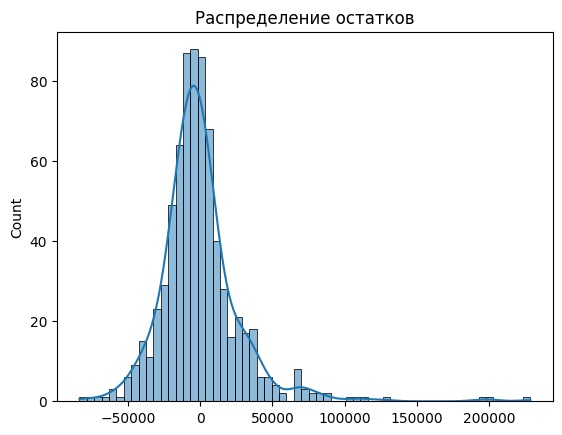

In [19]:
# Проверка на нормальность распределения остатков
p = stats.kstest(model.resid, 'norm', args=(model.resid.mean(), model.resid.std())).pvalue
print(f'P-value: {p:.3f}')

# График распределения остатков
sns.histplot(model.resid, kde=True)
plt.title("Распределение остатков")
plt.show()
# Если p-значение меньше 0.05, то распределение остатков отличается от нормального

- Сильное отклонение от нормального распределения, что подтверждается p-value, равным 0.000. Это отклонение может свидетельствовать о том, что модель не полностью отражает зависимость между предикторами и зависимой переменной. Причиной такого отклонения может быть отсутствие некоторых факторов, которые влияют на зависимую переменную, в модели или выбросы

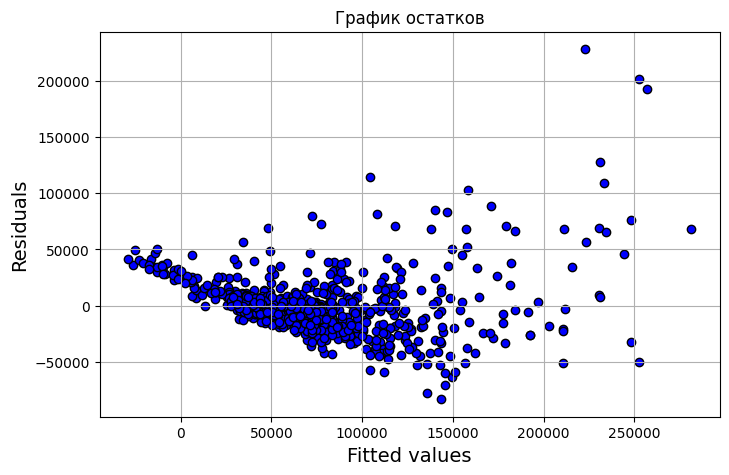

In [20]:
# Проверка гетероскедастичности
plt.figure(figsize=(8,5))
plt.scatter(x=model.fittedvalues, y=model.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title("График остатков")
plt.show()

- Наблюдается явная зависимость между остатками и предсказанными значениями, что указывает на наличие гетероскедастичности. Остатки не распределены случайным образом относительно горизонтальной линии, и их разброс увеличивается с ростом предсказанных значений. Это говорит о том, что дисперсия ошибок изменяется в зависимости от значений предсказанных переменных, что нарушает одно из ключевых предположений линейной регрессии о постоянной дисперсии ошибок. Гетероскедастичность может уменьшить точность коэффициентов регрессии и снизить надежность тестов на значимость. Она может быть вызвана тем, что в модели не учтены важные переменные, влияющие на зависимую переменную, или тем, что модель не адекватно описывает данные.

In [21]:
# Проверка мультиколлинеарности
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Вычисление VIF для каждого признака
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df = vif_df.sort_values(by=['VIF'])
print(vif_df)

# Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует

        VIF                  Features
8  1.133480     processor_brand_other
6  1.190778       processor_brand_amd
7  1.241876     processor_brand_apple
3  1.688394  primary_storage_capacity
4  1.688588          resolution_width
5  1.724735        gpu_type_dedicated
2  1.899897                ram_memory
0  2.158647                 num_cores
1  3.636744                    Rating


-  VIF для всех переменных находятся в пределах нормы (< 10), что указывает на отсутствие проблемы мультиколлинеарности в модели. Это означает, что предикторы не имеют сильной корреляции между собой, и их взаимная зависимость не влияет существенно на точность оценок регрессионных коэффициентов. Наибольшие значения VIF наблюдаются у переменных Rating (3.64) и num_cores (2.16), но они все еще находятся в пределах допустимого диапазона. Это свидетельствует о том, что мультиколлинеарность не оказывает значительного влияния на модель, и все предикторы могут быть использованы без риска искажения их воздействия на зависимую переменную (цену ноутбуков).

In [22]:
# Проверка на выбросы и влияющие наблюдения
influence = model.get_influence()
inf_sum = influence.summary_frame()
inf_sum = inf_sum.reset_index()

# потенциальные влияющие наблюдения
inf_sum['dffits'][(inf_sum['dffits'] > 1) | (inf_sum['dffits'] < -1)].sort_values()

# потенциальные выбросы
inf_sum['standard_resid'][(inf_sum['standard_resid'] > 3) | (inf_sum['standard_resid'] < -3)].sort_values()

2966    3.023685
897     3.023685
2447    3.023685
1022    3.023685
2395    3.023685
          ...   
1071    7.207588
1368    7.207588
1422    7.207588
2032    7.326014
2038    8.311327
Name: standard_resid, Length: 103, dtype: float64

- 103 наблюдения с аномальными значениями превышают пороговые значения для dffits (>1 или <-1) и стандартных остатков (>3 или <-3), что может свидетельствовать о возможном влиянии этих точек на модель

## Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

1. **Ожидаемые результаты**:
   - Большинство факторов, таких как `количество ядер процессора`, `рейтинг` и `объем оперативной памяти`, оказывают положительное влияние на цену ноутбука. Это логично, так как эти характеристики напрямую связаны с производительностью устройства и пользуются спросом у покупателей
   - `Процессоры Apple` значительно повышают цену, что соответствует статусу этих брендов на рынке, где они предлагают более дорогие устройства
   - `Гетероскедастичность` тоже была предсказуемой, так как стоимость ноутбуков может значительно варьироваться с ростом их производительности. Это свидетельствует о том, что более дорогие модели имеют более широкий разброс цен, вероятно, из-за дополнительных опций и уникальных характеристик

2. **Неожиданные результаты**:
   - Сильное отклонение от нормального распределения остатков показало, что модель может не полностью описывать сложные зависимости, что может потребовать пересмотра линейной структуры модели или добавления дополнительных переменных для более точного учета факторов, влияющих на цену
   - Процессоры AMD часто рассматриваются как конкуренты Intel, однако их влияние на цену оказалось отрицательным. Это может отражать маркетинговую стратегию AMD или восприятие бренда как более доступного в сравнении с конкурентами

**Общий вывод:** \
Модель продемонстрировала, что ключевые характеристики ноутбука, такие как количество ядер, объем памяти, расширение экрана и наличие дискретной видеокарты, оказывают наибольшее влияние на цену. Модель объясняет 75.23% вариации цен, что является хорошим результатом

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 13 ноября.